In [24]:
import nilearn
import numpy as np
import pandas as pd
from nilearn import plotting
from nilearn import image
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, view_img
from nilearn.glm.first_level import FirstLevelModel
from nilearn.image import concat_imgs, mean_img
from nilearn.plotting import plot_contrast_matrix
import matplotlib.pyplot as plt
from nilearn.glm import threshold_stats_img
from numpy import array
from nilearn.image import concat_imgs, index_img

In [25]:
def single_run(image_file, view_file, recall_file, confounds_file):
    events_view = pd.read_csv(view_file, sep='\t')
    events_view['trial_type'] = 'view'
    events_recall = pd.read_csv(recall_file, sep='\t')
    events_recall['trial_type'] = 'recall'
    events = pd.concat([events_view, events_recall])
    confounds = pd.read_csv(confounds_file, sep='\t')

    timings = np.arange(0, len(confounds))
    design_matrix_constant = make_first_level_design_matrix(timings, events, drift_model=None)
    design_matrix = pd.concat([design_matrix_constant, confounds], axis=1)

    view_array = np.zeros(len(design_matrix.columns))
    view_array[1] = 1

    recall_array = np.zeros(len(design_matrix.columns))
    recall_array[0] = 1

    conditions = {
        'view': view_array,
        'recall': recall_array,
    }
    view_minus_recall = conditions['view'] - conditions['recall']
    plot_contrast_matrix(view_minus_recall, design_matrix=design_matrix)

    fmri_imgs = image.load_img(image_file)
    avg_img = mean_img(fmri_imgs)
    
    #Model
    fmri_glm = FirstLevelModel(t_r=1,
                               noise_model='ar1',
                               standardize=False,
                               hrf_model='spm',
                               drift_model=None,
                               high_pass=.01)

    fmri_glm = fmri_glm.fit(fmri_imgs, design_matrices = design_matrix)
    
    beta_map = fmri_glm.compute_contrast(view_minus_recall, output_type = "all")
    return beta_map

11
12


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/bradpowell/.local/lib/python3.8/site-packages/nilearn/glm/regression.py:235: RuntimeWarning: overflow encountered in square
  dispersion = np.sum(wresid ** 2, 0) / (
/Users/bradpowell/.local/lib/python3.8/site-packages/nilearn/glm/first_level/first_level.py:95: RuntimeWarning: overflow encountered in matmul
  r[:, 0] += (y[:, np.newaxis, :] @ y[:, :, np.newaxis])[:, 0, 0]
/Users/bradpowell/.local/lib/python3.8/site-packages/nilearn/glm/first_level/first_level.py:97: RuntimeWarning: overflow encountered in matmul
  r[:, k] += (y[:, np.newaxis, 0:-k] @ y[:, k:, np.newaxis])[:, 0, 0]
/Users/bradpowell/.local/lib/python3.8/site-packages/nilearn/glm/first_level/first_level.py:97: RuntimeWarning: invalid value encountered in matmul
  r[:, k] += (y[:, np.newaxis, 0:-k] @ y[:, k:, np.newaxis])[:, 0, 0]
/Users/bradpowe

13
14
15
16
17


/Users/bradpowell/.local/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:351: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(.4 * len(design_column_names),


18
19
20


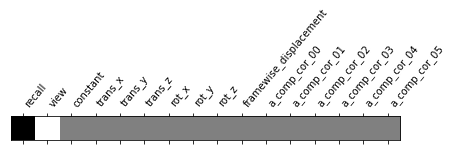

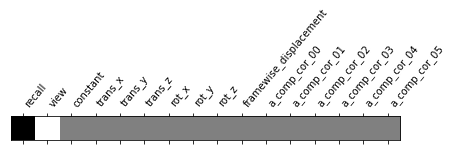

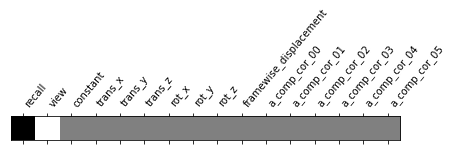

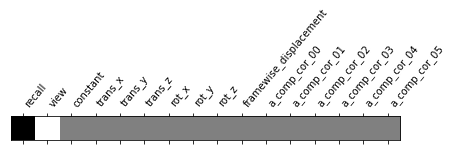

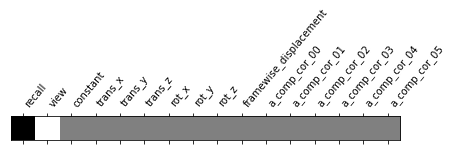

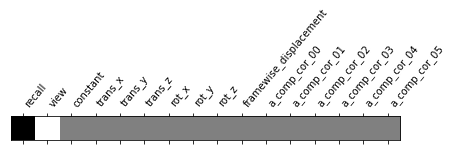

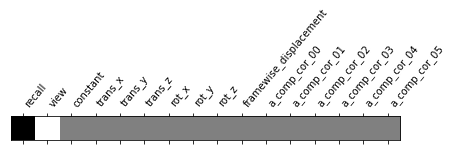

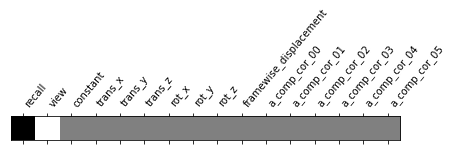

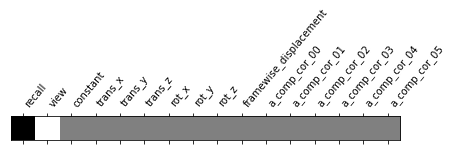

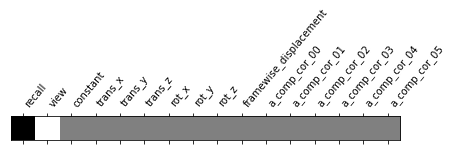

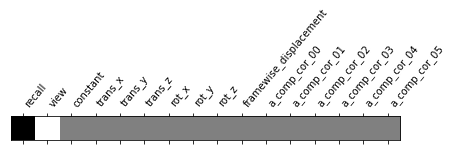

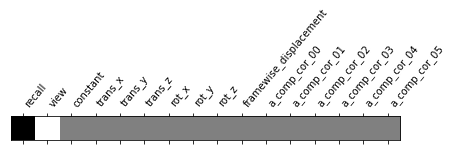

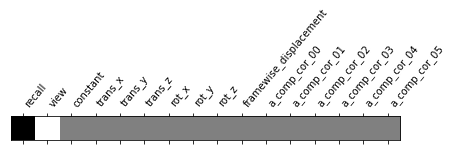

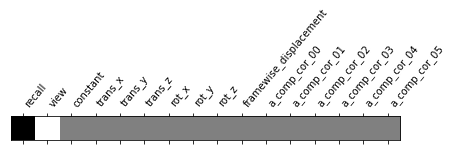

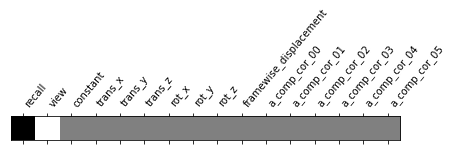

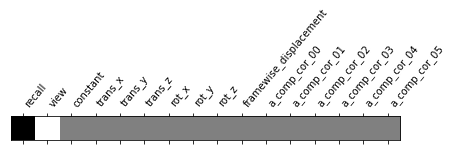

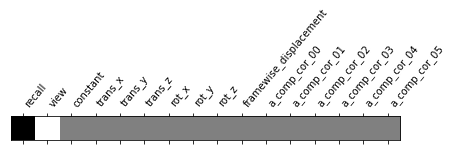

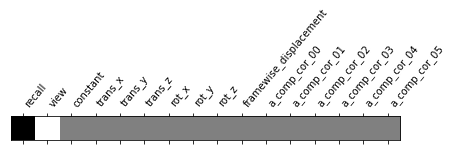

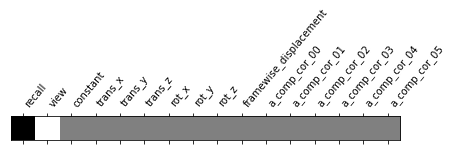

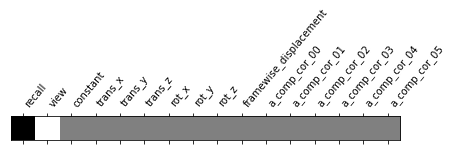

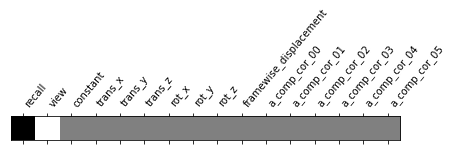

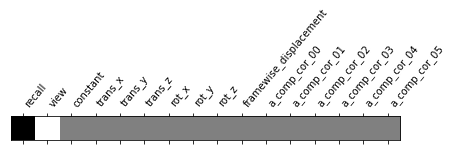

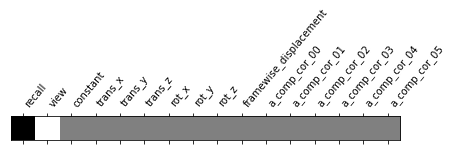

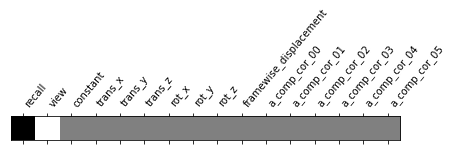

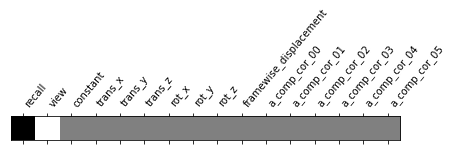

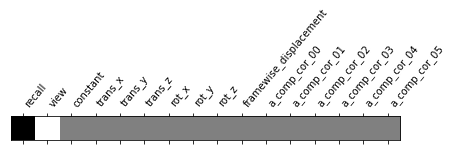

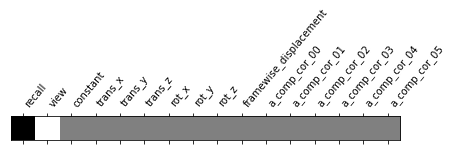

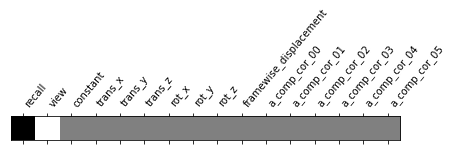

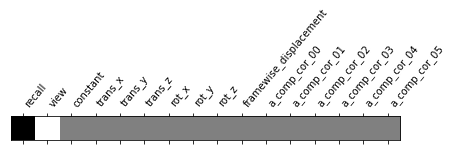

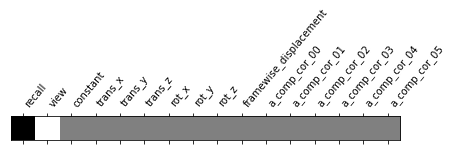

In [26]:
for subj in range(11, 21): #loop through subjects
    print(subj)
    for run in range(1, 4): #loop through runs
        image_file = "/Users/bradpowell/Desktop/sub-" + str(subj) + "/ses-01/images_" + str(run) + '.nii.gz'
        view_file = "/Users/bradpowell/Desktop/sub-" + str(subj) + "/ses-01/view_" + str(run) + '.tsv'
        recall_file = "/Users/bradpowell/Desktop/sub-" + str(subj) + "/ses-01/recall_" + str(run) + '.tsv'
        confounds_file = "/Users/bradpowell/Desktop/sub-" + str(subj) + "/ses-01/confounds_" + str(run) + '.txt'
        
        plot_dict = single_run(image_file, view_file, recall_file, confounds_file)

        for key in plot_dict:
            plot = plot_dict[key]
            plot.to_filename('subject' + str(subj) + '_run' + str(run) + '_' + key)